# Superposition d'écoulements
Avec ce TP numérique, nous allons implémenter les écoulements vus en classe et construire des écoulements plus complexe grace au prinicipe de superposition.

## Objectifs de la séance
Comprendre le lien pression, vitesse et la generation de la portance sur une forme


### Modules python et paramètres pour les graphiques
En plus des modules de base, nous utiliserons un module personnel pour implémenter les formules vues en classe et supperposer facilement les écoulements.  
**Attention** Si vous modifié le module `banque_ecoulement.py`, vous devez recharger le module après avoir redémarré le noyau `kernel`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import module.banque_ecoulements as bq

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10
Ncontours = 40

### Exercice 1 - Comprendre le fonctionnement du module

1. Ouvrez le fichier `banque_ecoulement.py` et essayer de comprendre l'utilisation qui en est faite ci-dessous.
2. Modifiez les paramètres de définitions de la grille ou de l'écoulement
3. Lorsque vous êtes suffisamment initié complétés les écoulements de la banque et testez les

In [3]:
grid = bq.create_2Dgrid_cart()

In [4]:
Vinf = 2.0
L = 5.0
d0 = 0.2

In [5]:
unif = bq.uniform(grid,Vinf)
source = bq.source(grid,L,center=[-d0,0.])
ecoul = bq.superpose_ecoulement(unif,source,grid)

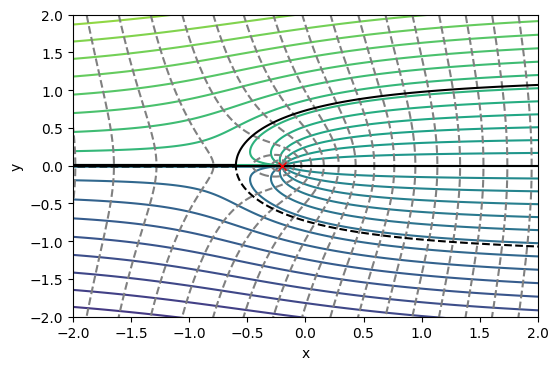

In [6]:
plt.plot([-d0,],[0.,],'x',color='red')
plt.contour(grid['x'],grid['y'],ecoul['psi'],Ncontours)
plt.contour(grid['x'],grid['y'],ecoul['phi'],Ncontours,linestyles='--',colors='grey')
plt.contour(grid['x'],grid['y'],ecoul['psi'],[-L/2,0.,L/2],colors='black')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Exercice 2 - Écoulement autour d'un cylindre
1. Créez un écoulement de vitesse $V_\infty=2.0\text{ m}$ autour d'un cylindre de rayon $R_0=0.5 \text{ m}$. Il n'y a pas de circulation. 
2. Visualisez les lignes de courant et les lignes potentielles à l'aide de `np.contour`.
3. Visualisez le champ de vitesse et le champ de pression à l'aide de `np.contourf`
4. Créez une grille correspondant à la surface du cylindre et évaluez l'écoulement sur cette grille.
5. Tracez la norme de la vitesse et le coefficient de pression $C_p$ sur la peau du cercle. 

In [7]:
Vinf = 2.0
R0 = 0.5
Kappa = 2*np.pi*Vinf*R0**2

In [8]:
grid = bq.create_2Dgrid_cyl(rbounds=[R0-1.0e-5,10*R0])
unif = bq.uniform(grid,Vinf)
dipole = bq.dipole(grid,Kappa)
ecoul = bq.superpose_ecoulement(unif,dipole,grid)
V = (ecoul['ur']**2 + ecoul['ut']**2)**0.5
Cp = 1 - (V/Vinf)**2

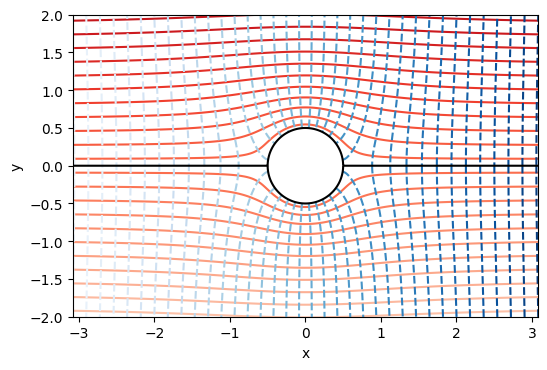

In [9]:
plt.contour(grid['x'],grid['y'],ecoul['psi'],np.linspace(-7,7,Ncontours),cmap=plt.cm.Reds)
plt.contour(grid['x'],grid['y'],ecoul['phi'],np.linspace(-7,7,Ncontours),linestyles='--',cmap=plt.cm.Blues)
plt.contour(grid['x'],grid['y'],ecoul['psi'],[0.,],colors='black')
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

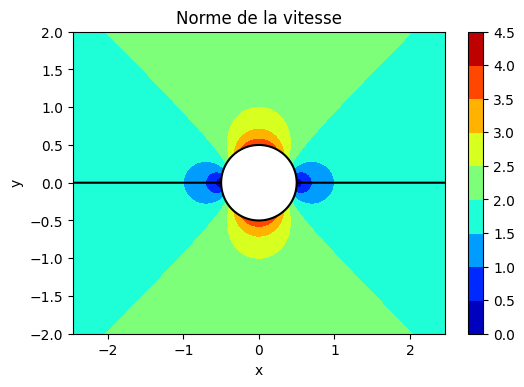

In [10]:
plt.contourf(grid['x'],grid['y'],V,cmap=plt.cm.jet)
plt.colorbar()
plt.contour(grid['x'],grid['y'],ecoul['psi'],[0.,],colors='black')
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Norme de la vitesse')
plt.show()

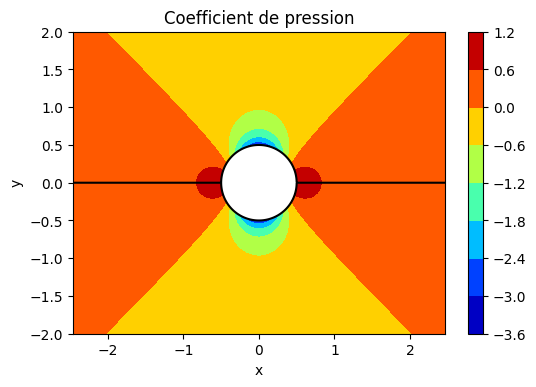

In [11]:
plt.contourf(grid['x'],grid['y'],Cp,cmap=plt.cm.jet)
plt.colorbar()
plt.contour(grid['x'],grid['y'],ecoul['psi'],[0.,],colors='black')
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coefficient de pression')
plt.show()

In [12]:
cercle = bq.create_2Dgrid_cyl(rbounds=[R0,R0],nr=1)
unif = bq.uniform(cercle,Vinf)
dipole = bq.dipole(cercle,Kappa)
ecoul = bq.superpose_ecoulement(unif,dipole,cercle)
V = (ecoul['ur']**2 + ecoul['ut']**2)**0.5
Cp = 1 - (V/Vinf)**2

In [13]:
# Creation du tableau des angles thetas pour les graphiques (en radians)
# On garde l'uique indice de R (le tableau devient 1D pour les tracées graphiques)
theta = np.arctan2(cercle['y'][:,0],cercle['x'][:,0])
# On ordonne theta de -pi a pi
theta_sorted,idx_srt = np.unique(theta,return_index=True)

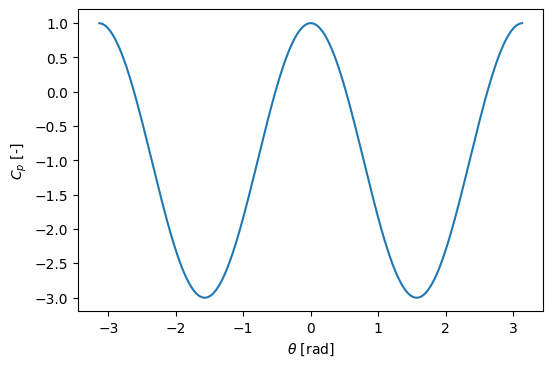

In [14]:
plt.plot(theta_sorted,Cp[idx_srt,0])
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$C_p$ [-]')
plt.show()

La position $\theta = 0$ est à l'aval.

### Exercice 3 - Écoulement autour d'un cylindre et forces aérodynamique
1. Ajoutez une circulation à cet écoulement.
2. Visualisez les lignes de courant et les lignes potentielles.
3. Visualisez le champ de vitesse et le champ de pression.
4. Créer une grille correspondant à la surface du cylindre et évaluez l'écoulement sur cette grille.
5. Tracez la norme de la vitesse et le coefficient de pression $C_p$ sur la peau du cercle. Calculez les coefficients de portance et trainée sur le cylindre. On utilisera l'intégration numérique de la méthode des trapèzes fournie par la fonction `np.trapz`
6. Faites varier l'intensité de la circulation et reprennez les étapes précédentes.


In [15]:
Vinf = 2.0
R0 = 0.5
Kappa = 2*np.pi*Vinf*R0**2
Gamma_limite = 4*np.pi*R0*Vinf
Gamma = 0.9 * Gamma_limite

In [16]:
grid = bq.create_2Dgrid_cyl(rbounds=[R0-1.0e-5,10*R0])
unif = bq.uniform(grid,Vinf)
dipole = bq.dipole(grid,Kappa)
tourb = bq.tourbillon(grid,Gamma,R0=R0)
ecoul = bq.superpose_ecoulement(unif,dipole,grid)
ecoul = bq.superpose_ecoulement(ecoul,tourb,grid)
V = (ecoul['ur']**2 + ecoul['ut']**2)**0.5
Cp = 1 - (V/Vinf)**2

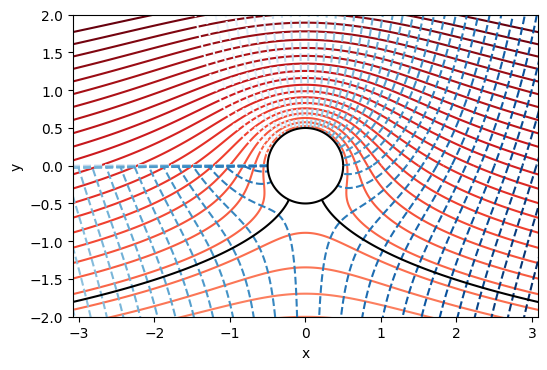

In [17]:
plt.contour(grid['x'],grid['y'],ecoul['psi'],np.linspace(-7,7,Ncontours),cmap=plt.cm.Reds)
plt.contour(grid['x'],grid['y'],ecoul['phi'],np.linspace(-7,7,Ncontours),linestyles='--',cmap=plt.cm.Blues)
plt.contour(grid['x'],grid['y'],ecoul['psi'],[0.,],colors='black')
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

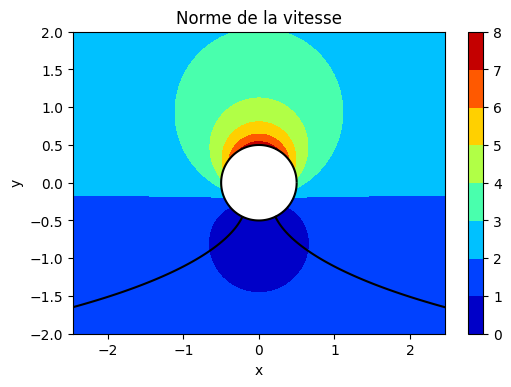

In [18]:
plt.contourf(grid['x'],grid['y'],V,cmap=plt.cm.jet)
plt.colorbar()
plt.contour(grid['x'],grid['y'],ecoul['psi'],[0.,],colors='black')
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Norme de la vitesse')
plt.show()

La vitesse accélère sur le dessus du cylindre

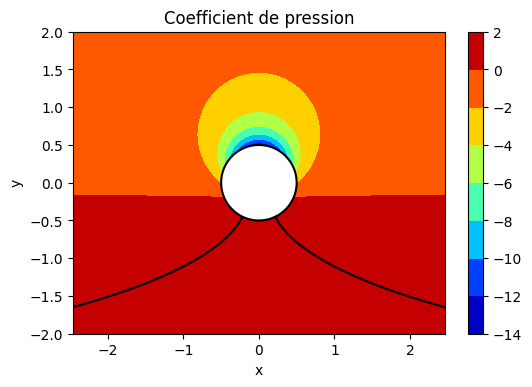

In [19]:
plt.contourf(grid['x'],grid['y'],Cp,cmap=plt.cm.jet)
plt.colorbar()
plt.contour(grid['x'],grid['y'],ecoul['psi'],[0.,],colors='black')
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coefficient de pression')
plt.show()

La pression dessous le cylindre est positive. La pression dessus le cylindre est négative. Le cylindre subit un effort de suction vers le haut : c'est la force de **portance**. 

In [20]:
cercle = bq.create_2Dgrid_cyl(rbounds=[R0,R0],nr=1,nt=2*360)
unif = bq.uniform(cercle,Vinf)
dipole = bq.dipole(cercle,Kappa)
tourb = bq.tourbillon(cercle,Gamma,R0=R0)
ecoul = bq.superpose_ecoulement(unif,dipole,cercle)
ecoul = bq.superpose_ecoulement(ecoul,tourb,cercle)
V = (ecoul['ur']**2 + ecoul['ut']**2)**0.5
Cp = 1 - (V/Vinf)**2

In [21]:
# Creation du tableau des angles thetas pour les graphiques (en radians)
# On garde l'uique indice de R (le tableau devient 1D pour les tracées graphiques)
theta = np.arctan2(cercle['y'][:,0],cercle['x'][:,0])
# On ordonne theta de -pi a pi
theta_sorted,idx_srt = np.unique(theta,return_index=True)
Cp_sorted = Cp[idx_srt,0]

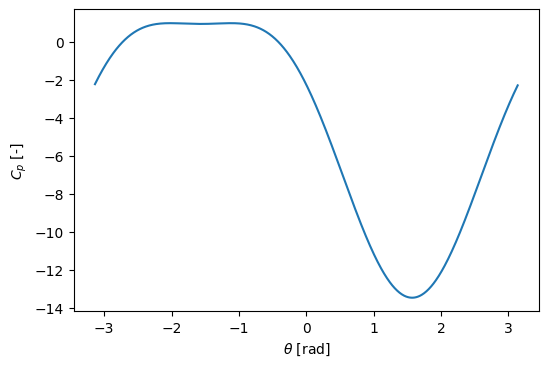

In [22]:
plt.plot(theta_sorted,Cp_sorted)
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$C_p$ [-]')
plt.show()

$\theta>0$ correspond à la supérieure du cylindre. $\theta<0$ correspond à la zone inférieure au cylindre. 

Les composantes de portance et de traînée viennent de l'intégration de la pression sur la peau.
\begin{align}
L^\prime &= \left[\int_{\mathcal{C}}{- p \, \vec{n} \, dl}\right]\cdot \vec{e}_y\\
D^\prime &= \left[\int_{\mathcal{C}}{- p \, \vec{n} \, dl}\right]\cdot \vec{e}_x
\end{align}
La normale correspond à :
\begin{align}
\vec{n} = \vec{e}_r = \cos(\theta) \vec{e}_x + \sin(\theta)  \vec{e}_y
\end{align}
Ainsi :
\begin{align}
L^\prime &= -\int_{-\pi}^{\pi}{ p \sin{\theta} \, R_0 \, d\theta}\\
D^\prime &= -\int_{-\pi}^{\pi}{ p \cos{\theta} \, R_0 \, d\theta}
\end{align}
En soustrayant l'intégrale (nulle) de la pression à l'infini amont $p_\infty$ et en divisant par la pression dynamique à l'infini amont $q_\infty = \frac{1}{2}\rho_\infty V_\infty^2$ et la corde (diamètre du cylindre), on trouve les coefficients de portance et trainée : 
\begin{align}
C_L^\prime &= \frac{L^\prime}{\rho_\infty V_\infty^2 \, R_0}=-\frac{1}{2}\int_{-\pi}^{\pi}{ C_p \sin{\theta} \, d\theta}\\
C_D^\prime &= \frac{D^\prime}{\rho_\infty V_\infty^2 \, R_0}=-\frac{1}{2}\int_{-\pi}^{\pi}{ C_p \cos{\theta} \, d\theta}
\end{align}
On peut faire cette intégrale analytiquement ou numériquement.

In [23]:
CL = -0.5*np.trapz(Cp_sorted*np.sin(theta_sorted),theta_sorted)
CD = -0.5*np.trapz(Cp_sorted*np.cos(theta_sorted),theta_sorted)
print(f'CL: {CL:.4f}')
print(f'CD: {CD:.4f}')

CL: 11.3097
CD: 0.0098


La precision numérique de l'intégrale fait que le coefficient de traînée n'est pas exactement nul. La valeur diminue en augmentant la discrétisation en $\theta$ voir paramètre `nt`.